# Data Mining - Handin 1 - Clustering 
Welcome to the handin on clustering algorithms and outlier detection. 
This handin corresponds to the topics in Week 5--9 in the course.

The handin is 
* done in the chosen handin groups
* worth 10% of the final grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Brightspace no later than **March 10th kl. 23:59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is 100. For the maximum grade you need to get at least _80 points_. The minimum grade (02 in the Danish scale)
requires **at least** 30 points, with at least 8 points on of the first three Parts (Part 1,2,3) and 6 points in the last part (Part 4).

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

<font color='red'>**!!! IMPORTANT: YOU ARE NOT ALLOWED TO USE LIBRARY FUNCTIONS (SCIPY, NUMPY etc.) UNLESS EXPLICITY MENTIONED !!!**
</font>

Good luck!

In [1]:
import sys
#!conda install --yes --prefix {sys.prefix} seaborn

In [2]:
## DO NOT TOUCH
import numpy as np
import pandas as pd
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
import time
import seaborn as sns

RANDOM_SEED = 132414
## DO NOT TOUCH
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

wq = pd.read_csv("./data/winequality-red.csv", sep=';')
toy = wq[wq['quality'].isin([4, 8])].sample(n=20, random_state=RANDOM_SEED)

# Intro Excercises

## Task 1.1 K-Means and DBScan

### Task 1.1.1 (5 points)
<span style='color: green'>**\[Compute by hand\]**</span> the cluster assignments _for the dataset below_ using k-means and $k = 2$, with initial centroids being (0, 0) and (1,1)

<font color='red'>To evaluate (i.e., only to control the correctness and not to solve the exercise) your results you can use **sklearn.cluster.KMeans**.</font>


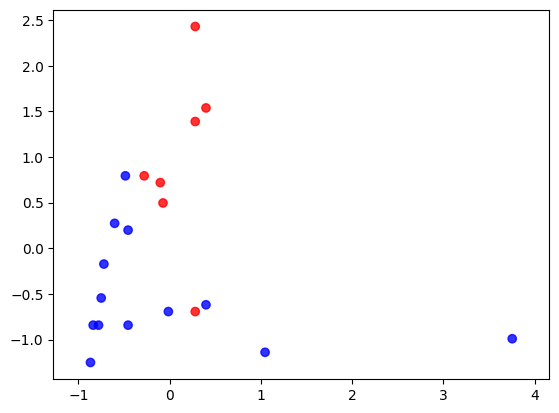

In [3]:
color_map = {4:'Blue', 8:'Red'}
X_kmeans = toy[["sulphates", "alcohol"]]

scaler = StandardScaler().fit(X_kmeans)
X_scaled = scaler.transform(X_kmeans)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=toy['quality'].map(color_map))
plt.axis('equal');

[[ 0.09502465 -0.78508876]
 [-0.11614124  0.95955293]]


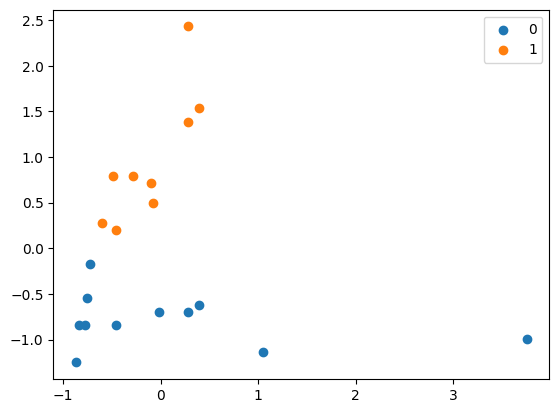

In [4]:
kmeans = KMeans(2, init=[[-1,-1],[0,2.5]]).fit(X_scaled)
label = kmeans.labels_
u_labels = np.unique(label)
 
centroids = kmeans.cluster_centers_
print(centroids)
#plotting the results:
 
for i in u_labels:
    plt.scatter(X_scaled[label == i , 0] , X_scaled[label == i , 1] , label = i)
plt.legend()
plt.show()

*******************
Firstly, we computer the centroid $\mu_i$ for cluster $C_i$. We do this just below. <br>
$\mu_0 = \frac{1}{|C_0|} \Sigma_{x \in C_0} x = (0,0)$ <br>
$\mu_1 = \frac{1}{|C_1|} \Sigma_{x \in C_1} x = (1,1)$ <br>
We now assign the points to the cluster with the closest centroid. Thereby, we compute the Euclidean distance and assign the points to clusters. Formally, assign a point $x \in D$ to the cluster $j$ such that $j = argmin_i ||x-\mu_i||$. We now compute the distance to each cluster for each point and assign the point to the cluster with the smallest distance. <br>
$\sqrt{||x_0-\mu_0||^2} = \sqrt{(-0.75082858-0)^2 + (-0.54497977-0)^2} = \sqrt{0.86074650625} = 0.92776425$ <br>
$\sqrt{||x_0-\mu_1||^2} = \sqrt{(-0.75082858-1)^2 + (-0.54497977-1)^2} = \sqrt{5.45236320625} = 2.33502959$ <br>
We add $x_0$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_1-\mu_0||^2} = \sqrt{(-0.456386-0)^2 + (0.19901992-0)^2} = \sqrt{0.24789710955} = 0.4978926687$ <br>
$\sqrt{||x_1-\mu_1||^2} = \sqrt{(-0.456386-1)^2 + (0.19901992-1)^2 }= \sqrt{2.76262926955} = 1.66211590136$<br>
We add $x_1$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_2-\mu_0||^2} = \sqrt{(-0.01472213-0)^2 + (-0.69377971-0)^2 }= \sqrt{0.48154702711} = 0.69393589553$ <br>
$\sqrt{||x_2-\mu_1||^2} = \sqrt{(-0.01472213-1)^2 + (-0.69377971-1)^2 }= \sqrt{3.89855070712} = 1.97447479273$ <br>
We add $x_2$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_3-\mu_0||^2} = \sqrt{(-0.456386-0)^2 + (-0.84257965-0)^2 }= \sqrt{0.91822864759}=0.95824247849$ <br>
$\sqrt{||x_3-\mu_1||^2} = \sqrt{(-0.456386-1)^2 + (-0.84257965-1)^2 }= \sqrt{5.51615994759} = 2.34865066529$ <br>
We add $x_3$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_4-\mu_0||^2} = \sqrt{(0.27972045-0)^2 + (1.38941942-0)^2 }= \sqrt{2.00872985482} = 1.41729667142$ <br>
$\sqrt{||x_4-\mu_1||^2} = \sqrt{(0.27972045-1)^2 + (1.38941942-1)^2 }= \sqrt{0.67045011482} = 0.81881018241$ <br>
We add $x_4$ to the $C_1$ cluster as it has the smallest distance. <br>
$\sqrt{||x_5-\mu_0||^2} = \sqrt{(-0.83916135-0)^2 + (-0.84257965-0)^2 }= \sqrt{1.41413223793} = 1.18917292179$ <br>
$\sqrt{||x_5-\mu_1||^2} = \sqrt{(-0.83916135-1)^2 + (-0.84257965-1)^2 }= \sqrt{6.77761423793} = 2.60338514975$ <br>
We add $x_5$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_6-\mu_0||^2} = \sqrt{(0.27972045-0)^2 + (2.43101898-0)^2} = \sqrt{5.98809681127} = 2.4470588083$ <br>
$\sqrt{||x_6-\mu_1||^2} = \sqrt{(0.27972045-1)^2 + (2.43101898-1)^2} = \sqrt{2.56661795127} = 1.60206677491$ <br>
We add $x_6$ to the $C_1$ cluster as it has the smallest distance. <br>
$\sqrt{||x_7-\mu_0||^2} = \sqrt{(-0.60360729-0)^2 + (0.27341989-0)^2} = \sqrt{0.43910019678} = 0.66264635876$ <br>
$\sqrt{||x_7-\mu_1||^2} = \sqrt{(-0.60360729-1)^2 + (0.27341989-1)^2} = \sqrt{3.09947499679} = 1.76053258896$ <br>
We add $x_7$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_8-\mu_0||^2} = \sqrt{(-0.1030549-0)^2 + (0.7198197-0)^2} = \sqrt{0.52876071292} = 0.72715934493$ <br>
$\sqrt{||x_8-\mu_1||^2} = \sqrt{(-0.1030549-1)^2 + (0.7198197-1)^2} = \sqrt{1.29523111292} = 1.13808220833$ <br>
We add $x_8$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_9-\mu_0||^2} = \sqrt{(0.27972045-0)^2 + (-0.69377971-0)^2 }= \sqrt{0.55957381615} = 0.74804666709$ <br>
$\sqrt{||x_9-\mu_1||^2} = \sqrt{(0.27972045-1)^2 + (-0.69377971-1)^2 }= \sqrt{3.38769233616} = 1.84056848179$ <br>
We add $x_9$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_{10}-\mu_0||^2 }=\sqrt{(-0.72138432-0)^2 + (-0.17297993-0)^2} =\sqrt{0.55031739332} = 0.74183380437$ <br>
$\sqrt{||x_{10}-\mu_1||^2 }=\sqrt{(-0.72138432-1)^2 + (-0.17297993-1)^2} =\sqrt{4.33904589332} = 2.08303766008$ <br>
We add $x_{10}$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_{11}-\mu_0||^2 }=\sqrt{(3.75414288-0)^2 + (-0.99137958-0)^2 }=\sqrt{15.0764222351} = 3.8828368798$ <br>
$\sqrt{||x_{11}-\mu_1||^2 }=\sqrt{(3.75414288-1)^2 + (-0.99137958-1)^2 }=\sqrt{11.5508956351} = 3.39866085909$ <br>
We add $x_{11}$ to the $C_1$ cluster as it has the smallest distance. <br>
$\sqrt{||x_{12}-\mu_0||^2 }=\sqrt{(0.39749748-0)^2 + (-0.61937974-0)^2 }=\sqrt{0.54163550892} = 0.73595890436$ <br>
$\sqrt{||x_{12}-\mu_1||^2 }=\sqrt{(0.39749748-1)^2 + (-0.61937974-1)^2 }=\sqrt{2.98540002893} = 1.72783101863$ <br>
We add $x_{12}$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_{13}-\mu_0||^2 }=\sqrt{(-0.78027283-0)^2 + (-0.84257965-0)^2} =\sqrt{1.31876615583} = 1.14837544202$ <br>
$\sqrt{||x_{13}-\mu_1||^2 }=\sqrt{(-0.78027283-1)^2 + (-0.84257965-1)^2} =\sqrt{6.56447111583} = 2.56212238502$ <br>
We add $x_{13}$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_{14}-\mu_0||^2 }=\sqrt{(-0.48583026-0)^2 + (0.79421967-0)^2 }=\sqrt{0.86681592574} = 0.93102949778$ <br>
$\sqrt{||x_{14}-\mu_1||^2 }=\sqrt{(-0.48583026-1)^2 + (0.79421967-1)^2 }=\sqrt{2.25003710575} = 1.50001236853$ <br>
We add $x_{14}$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_{15}-\mu_0||^2 }=\sqrt{(-0.07361064-0)^2 + (0.49661979-0)^2 }=\sqrt{0.25204974214} = 0.50204555783$ <br>
$\sqrt{||x_{15}-\mu_1||^2 }=\sqrt{(-0.07361064-1)^2 + (0.49661979-1)^2 }=\sqrt{1.40603144214} = 1.1857619669$ <br>
We add $x_{15}$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_{16}-\mu_0||^2 }=\sqrt{(-0.27972045-0)^2 + (0.79421967-0)^2 }=\sqrt{0.70902841436} = 0.84203824993$ <br>
$\sqrt{||x_{16}-\mu_1||^2 }=\sqrt{(-0.27972045-1)^2 + (0.79421967-1)^2 }=\sqrt{1.68002997436} = 1.29615970249$ <br>
We add $x_{16}$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_{17}-\mu_0||^2 }=\sqrt{(0.39749748-0)^2 + (1.53821935-0)^2 =} \sqrt{2.52412301532} = 1.58874888366$ <br>
$\sqrt{||x_{17}-\mu_1||^2 }=\sqrt{(0.39749748-1)^2 + (1.53821935-1)^2 =} \sqrt{0.65268935532} = 0.80789192056$ <br>
We add $x_{17}$ to the $C_1$ cluster as it has the smallest distance. <br>
$\sqrt{||x_{18}-\mu_0||^2 }=\sqrt{(1.04527116-0)^2 + (-1.14017952-0)^2 }=\sqrt{2.39260113576} = 1.54680352203$ <br>
$\sqrt{||x_{18}-\mu_1||^2 }=\sqrt{(1.04527116-1)^2 + (-1.14017952-1)^2 }=\sqrt{4.58241785576} = 2.14065827627$ <br>
We add $x_{18}$ to the $C_0$ cluster as it has the smallest distance. <br>
$\sqrt{||x_{19}-\mu_0||^2 }=\sqrt{(-0.86860561-0)^2 + (-1.25177947-0)^2} =\sqrt{2.32142754724} = 1.52362316445$ <br>
$\sqrt{||x_{19}-\mu_1||^2 }=\sqrt{(-0.86860561-1)^2 + (-1.25177947-1)^2} =\sqrt{8.56219770724} = 2.926123324$ <br>
We add $x_{19}$ to the $C_0$ cluster as it has the smallest distance. <br>
Currently the clusters are the following: $C_0 = \{x_0, x_1, x_2, x_3, x_5, x_7, x_8, x_9, x_{10}, x_{12}, x_{13}, x_{14}, x_{15}, x_{16}, x_{18}, x_{19}\}$ and $C_1 = \{x_4, x_6, x_{11}, x_{17}\}$. We now recompute the centroids. <br>
$\mu_0 = \frac{1}{|C_0|} \Sigma_{x \in C_0} x = (-0.29444258, -0.27295489)$ <br>
$\mu_1 = \frac{1}{|C_1|} \Sigma_{x \in C_1} x = (1.17777032, 1.09181954)$ <br>
Repeat the computation with the new recomputed centroids.
You will find that in the next iteration the centroids are the same and the algorithm exits, so we will not include those calculations.
******************

In [5]:
def L2_norm(x, y):
    
    return np.sqrt(np.sum((x-y)**2))

In [6]:
def k_means(X, centroids=np.array([np.array([-1,-1]),np.array([0,2.5])]), k=2):
    prev_centroids = np.array([np.array([1,0]),np.array([0,1])])
    while np.not_equal(prev_centroids,centroids).any():
        sorted_points = [[] for _ in range(k)]
        sorted_points_idx = [[] for _ in range(k)]
        for i,x in enumerate(X):
            dists = [L2_norm(x,c) for c in centroids]
            centroid_idx = np.argmin(dists)
            sorted_points[centroid_idx].append(x)
            sorted_points_idx[centroid_idx].append(i)        
        prev_centroids = centroids
        centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
        for i, centroid in enumerate(centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    centroids[i] = prev_centroids[i]
        
    return sorted_points_idx,centroids


### Task 1.1.2 (2 point)
<span style='color: green'>**\[Compute by hand\]**</span> <br>
A) Show two examples with two different initial cluster assignments that lead to a different result. <br>

*******************
1)<br>
Current centroids are  $\mu0 = (0,1),\mu_1=(3,-1)$<br>
For point  0 the distances to the centroids are as such  (1.7177619292044644, 3.7783274636016437)<br>
Point  0 will be assigned to cluster  0<br>
For point  1 the distances to the centroids are as such  (0.9218770379952362, 3.6584495247964344)<br>
Point  1 will be assigned to cluster  0<br>
For point  2 the distances to the centroids are as such  (1.6938436890276736, 3.0302343773397147)<br>
Point  2 will be assigned to cluster  0<br>
For point  3 the distances to the centroids are as such  (1.8982591845808912, 3.4599689786470216)<br>
Point  3 will be assigned to cluster  0<br>
For point  4 the distances to the centroids are as such  (0.4794695114381253, 3.620669272094072)<br>
Point  4 will be assigned to cluster  0<br>
For point  5 the distances to the centroids are as such  (2.0246707202438707, 3.8423874146774892)<br>
Point  5 will be assigned to cluster  0<br>
For point  6 the distances to the centroids are as such  (1.4581011109827118, 4.378562785467728)<br>
Point  6 will be assigned to cluster  0<br>
For point  7 the distances to the centroids are as such  (0.9445953739738483, 3.8219868766754903)<br>
Point  7 will be assigned to cluster  0<br>
For point  8 the distances to the centroids are as such  (0.29853193246943616, 3.547778110633213)<br>
Point  8 will be assigned to cluster  0<br>
For point  9 the distances to the centroids are as such  (1.7167216524691773, 2.7374608117105983)<br>
Point  9 will be assigned to cluster  0<br>
For point  10 the distances to the centroids are as such  (1.377053828205515, 3.8121730614414484)<br>
Point  10 will be assigned to cluster  0<br>
For point  11 the distances to the centroids are as such  (4.249609563909585, 0.7541921519972866)<br>
Point  11 will be assigned to cluster  1<br>
For point  12 the distances to the centroids are as such  (1.6674516455949373, 2.630188422717371)<br>
Point  12 will be assigned to cluster  0<br>
For point  13 the distances to the centroids are as such  (2.0009811217817246, 3.7835491107892887)<br>
Point  13 will be assigned to cluster  0<br>
For point  14 the distances to the centroids are as such  (0.5276140473324437, 3.9204893550804956)<br>
Point  14 will be assigned to cluster  0<br>
For point  15 the distances to the centroids are as such  (0.508733880646781, 3.4186186093484596)<br>
Point  15 will be assigned to cluster  0<br>
For point  16 the distances to the centroids are as such  (0.3472593784168214, 3.738420848920697)<br>
Point  16 will be assigned to cluster  0<br>
For point  17 the distances to the centroids are as such  (0.6690921621275788, 3.6353234858785464)<br>
Point  17 will be assigned to cluster  0<br>
For point  18 the distances to the centroids are as such  (2.381797676853659, 1.9597487469684451)<br>
Point  18 will be assigned to cluster  1<br>
For point  19 the distances to the centroids are as such  (2.4135008815242247, 3.8767902005165724)<br>
Point  19 will be assigned to cluster  0<br>
Currently the clusters are the following: $C_0= \{x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_{10}, x_{12}, x_{13}, x_{14}, x_{15}, x_{16}, x_{17}, x_{19}\}, C_1 = \{x_{11}, x_{18}\}$<br>
$\mu_0 = \frac{1}{|C_0|} \Sigma_{x \in C_0} x = (-0.26663411,  0.11841995)$ <br>
$\mu_1 = \frac{1}{|C_1|} \Sigma_{x \in C_1} x = (2.39970702, -1.06577955)$ <br>
Repeat the computation with the new recomputed centroids.<br>
You will find that in the next iteration the centroids are the same and the algorithm exits, so we will not include those calculations.
<br>
<br>
2)<br>
Initial centroids are  [[-1.  -1. ],[ 0.   2.5]] with which we get the following cluster assignments: 
[[0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 13, 15, 18, 19], [4, 6, 8, 14, 16, 17]]

Centroids in iteration 2 are  [[-0.00630948, -0.54763691][0.01472213, 1.27781946]]<br>
Cluster assignments [[0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 13, 18, 19], [4, 6, 8, 14, 15, 16, 17]]

Centroids in iteration 3 are  [[-0.00113247, -0.62796435],[0.00210316, 1.16621951]]<br>
Cluster assignments [[0, 1, 2, 3, 5, 9, 10, 11, 12, 13, 18, 19], [4, 6, 7, 8, 14, 15, 16, 17]]

Centroids in iteration 4 are  [array([ 0.04907376, -0.7030797 ]), array([-0.07361064,  1.05461956])]<br>
Cluster assignments [[0, 2, 3, 5, 9, 10, 11, 12, 13, 18, 19], [1, 4, 6, 7, 8, 14, 15, 16, 17]]

Updated centroids are  [array([ 0.09502465, -0.78508876]), array([-0.11614124,  0.95955293])]<br>
Cluster assignments [[0, 2, 3, 5, 9, 10, 11, 12, 13, 18, 19], [1, 4, 6, 7, 8, 14, 15, 16, 17]]

After which the algorithm exits.

******************

<span style='color: green'>**\[Motivate\]**</span> <br>
B) How you explain the difference between the two cluster assignments in point A)?

*******************
The first initialization had one centroid on the far left and one on the far right which lead to the outlier having a large effect. Whereas the second initialization had centroids that were closer together and were "fighting" more for the denser regeion of points.
******************

### Task 1.1.3 (5 points)
<span style='color: green'>**\[Compute by hand\]**</span> the dendrogram for the dataset of Task 1.1.1. using **average-link**.

*******************
In the following we compute the dendrogram for the dataset given in Task 1.1.1. We also show the current clustering and furthermore, the two clusters with the smallest distance. In order to obtain the agglomorative hierarchical lustering we firstly, placed each object in its own cluster. We then computed all the pairwise distances between the clusters. We did this using the Average-Link distance. Then we selected the smallest distance, updated the clustering and finally the distance. We continued with this process until all objects was contained within a single cluster. 
******************

In [7]:
def average_link(C1,C2,dist=L2_norm):
    total_distance = 0
    for x in C1:
        for y in C2:
            total_distance += dist(x,y)
    return total_distance/(len(C1)*len(C2))


In [8]:
def agglomorative_hierarchical_clustering(X,dist=average_link):
    t = 1
    clusters = [[[x] for x in X]]
    clusters_idx = [[[i] for i,x in enumerate(X)]]
    print(clusters_idx[-1])
    linkage = []

    while len(clusters[-1]) > 1:
        new_clusters = None
        new_clusters_idx =None
        #print(len(clusters[-1]))
        dists = []
        for i,C_i in enumerate(clusters[-1]):
            dist_i = []
            for j,C_j in enumerate(clusters[-1]):
                if i != j:
                    dist_i.append(dist(C_i,C_j))
                else:
                    dist_i.append(float("inf"))
            dists.append(dist_i)
        dists_matrix = np.matrix(dists)
        min_i,min_j = np.unravel_index(dists_matrix.argmin(), shape=dists_matrix.shape)
        new_clusters = clusters[-1].copy()
        new_clusters_idx = clusters_idx[-1].copy()
        cluster1,cluster2 = new_clusters_idx[min_i].copy(),new_clusters_idx[min_j].copy()
        new_clusters[min_i].extend(new_clusters[min_j])
        new_clusters_idx[min_i].extend(new_clusters_idx[min_j])
        del new_clusters[min_j]
        del new_clusters_idx[min_j]
        clusters.append(new_clusters)
        clusters_idx.append(new_clusters_idx)
        print("Dist between cluster ", cluster1, " and ", cluster2, " was ", dists_matrix[min_i,min_j]) 
        print(clusters_idx[-1])

    return clusters, clusters_idx

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19]]<br>
Dist between cluster  [5]  and  [13]  was  0.05888851583859289<br>
[[0], [1], [2], [3], [4], [5, 13], [6], [7], [8], [9], [10], [11], [12], [14], [15], [16], [17], [18], [19]]<br>
Dist between cluster  [9]  and  [12]  was  0.1393082357335863<br>
[[0], [1], [2], [3], [4], [5, 13], [6], [7], [8], [9, 12], [10], [11], [14], [15], [16], [17], [18], [19]]<br>
Dist between cluster  [1]  and  [7]  was  0.16495291286596545<br>
[[0], [1, 7], [2], [3], [4], [5, 13], [6], [8], [9, 12], [10], [11], [14], [15], [16], [17], [18], [19]]<br>
Dist between cluster  [4]  and  [17]  was  0.18977052089497892<br>
[[0], [1, 7], [2], [3], [4, 17], [5, 13], [6], [8], [9, 12], [10], [11], [14], [15], [16], [18], [19]]<br>
Dist between cluster  [8]  and  [16]  was  0.19169264730699906<br>
[[0], [1, 7], [2], [3], [4, 17], [5, 13], [6], [8, 16], [9, 12], [10], [11], [14], [15], [18], [19]]<br>
Dist between cluster  [8, 16]  and  [15]  was  0.2935688560447423<br>
[[0], [1, 7], [2], [3], [4, 17], [5, 13], [6], [8, 16, 15], [9, 12], [10], [11], [14], [18], [19]]<br>
Dist between cluster  [0]  and  [5, 13]  was  0.30474273298898535<br>
[[0, 5, 13], [1, 7], [2], [3], [4, 17], [6], [8, 16, 15], [9, 12], [10], [11], [14], [18], [19]]<br>
Dist between cluster  [2]  and  [9, 12]  was  0.356661235009513<br>
[[0, 5, 13], [1, 7], [2, 9, 12], [3], [4, 17], [6], [8, 16, 15], [10], [11], [14], [18], [19]]<br>
Dist between cluster  [8, 16, 15]  and  [14]  was  0.36815616018426384<br>
[[0, 5, 13], [1, 7], [2, 9, 12], [3], [4, 17], [6], [8, 16, 15, 14], [10], [11], [18], [19]]<br>
Dist between cluster  [0, 5, 13]  and  [3]  was  0.37510179237847235<br>
[[0, 5, 13, 3], [1, 7], [2, 9, 12], [4, 17], [6], [8, 16, 15, 14], [10], [11], [18], [19]]<br>
Dist between cluster  [1, 7]  and  [10]  was  0.4592058460410584<br>
[[0, 5, 13, 3], [1, 7, 10], [2, 9, 12], [4, 17], [6], [8, 16, 15, 14], [11], [18], [19]]<br>
Dist between cluster  [0, 5, 13, 3]  and  [19]  was  0.5315659208877217<br>
[[0, 5, 13, 3, 19], [1, 7, 10], [2, 9, 12], [4, 17], [6], [8, 16, 15, 14], [11], [18]]<br>
Dist between cluster  [1, 7, 10]  and  [8, 16, 15, 14]  was  0.7333676897468325<br>
[[0, 5, 13, 3, 19], [1, 7, 10, 8, 16, 15, 14], [2, 9, 12], [4, 17], [6], [11], [18]]<br>
Dist between cluster  [2, 9, 12]  and  [18]  was  0.9558400400274<br>
[[0, 5, 13, 3, 19], [1, 7, 10, 8, 16, 15, 14], [2, 9, 12, 18], [4, 17], [6], [11]]<br>
Dist between cluster  [4, 17]  and  [6]  was  0.971067090850382<br>
[[0, 5, 13, 3, 19], [1, 7, 10, 8, 16, 15, 14], [2, 9, 12, 18], [4, 17, 6], [11]]<br>
Dist between cluster  [0, 5, 13, 3, 19]  and  [2, 9, 12, 18]  was  1.2062153063558358<br>
[[0, 5, 13, 3, 19, 2, 9, 12, 18], [1, 7, 10, 8, 16, 15, 14], [4, 17, 6], [11]]<br>
Dist between cluster  [0, 5, 13, 3, 19, 2, 9, 12, 18]  and  [1, 7, 10, 8, 16, 15, 14]  was  1.4465486361524036<br>
[[0, 5, 13, 3, 19, 2, 9, 12, 18, 1, 7, 10, 8, 16, 15, 14], [4, 17, 6], [11]]<br>
Dist between cluster  [0, 5, 13, 3, 19, 2, 9, 12, 18, 1, 7, 10, 8, 16, 15, 14]  and  [4, 17, 6]  was  2.2213786193834726<br>
[[0, 5, 13, 3, 19, 2, 9, 12, 18, 1, 7, 10, 8, 16, 15, 14, 4, 17, 6], [11]]<br>
Dist between cluster  [0, 5, 13, 3, 19, 2, 9, 12, 18, 1, 7, 10, 8, 16, 15, 14, 4, 17, 6]  and  [11]  was  4.208108844455588<br>
[[0, 5, 13, 3, 19, 2, 9, 12, 18, 1, 7, 10, 8, 16, 15, 14, 4, 17, 6, 11]]<br>
![alt text](images/dendogram.png "Dendogram")

### Task 1.1.4 (2 points)
A) <span style='color: green'>**\[Compute by hand\]**</span> the density-based clustering for the dataset of Task 1.1.1 using $\epsilon=0.35$ and $MinPts=3$. Present at least 2 iterations of the algorithm.<br> 
<font color='red'>**IMPORTANT: For this exercise you can use the DBSCAN from sklearn ONLY TO CHECK YOUR RESULTS**</font>

*******************
**YOUR ANSWER HERE**
******************

In [12]:
print(X_scaled)

[[-0.75082858 -0.54497977]
 [-0.456386    0.19901992]
 [-0.01472213 -0.69377971]
 [-0.456386   -0.84257965]
 [ 0.27972045  1.38941942]
 [-0.83916135 -0.84257965]
 [ 0.27972045  2.43101898]
 [-0.60360729  0.27341989]
 [-0.1030549   0.7198197 ]
 [ 0.27972045 -0.69377971]
 [-0.72138432 -0.17297993]
 [ 3.75414288 -0.99137958]
 [ 0.39749748 -0.61937974]
 [-0.78027283 -0.84257965]
 [-0.48583026  0.79421967]
 [-0.07361064  0.49661979]
 [-0.27972045  0.79421967]
 [ 0.39749748  1.53821935]
 [ 1.04527116 -1.14017952]
 [-0.86860561 -1.25177947]]


$\epsilon = 0.35$ and $MinPts = 3$<br>

To calculate which points are core points I do the following:<br>
For every point x calculate the neighbourhood of x by finding all points have distance <= $\epsilon$ to x.<br>
$N(x)= \{y \in D | \sqrt{(x-y)^2} \leq \epsilon \}$


For example consider x = (-0.75082858, -0.54497977) <br>

Firstly the point itself will always be in the neighborhood, since $\sqrt{(-0.75082858-(-0.75082858))^2+(-0.54497977-(-0.54497977))^2} =0$.<br>
We then ask for all other points <br>
Is point (-0.456386,0.19901992) in the neighborhood? $\sqrt{(-0.75082858-(-0.456386))^2+(-0.54497977-0.19901992)^2} = 0.8001450$.<br>
So not in the neighborhood.<br>
Is point (-0.01472213,-0.69377971) in the neighborhood? $\sqrt{(-0.75082858-(-0.01472213))^2+(-0.54497977-(-0.69377971))^2} = 0.75099542$.<br>
So not in the neighborhood.<br>
You will find the neigborhood of x to be (-0.75082858, -0.54497977), (-0.83916135, -0.84257965), (-0.78027283, -0.84257965).<br>

A point will be a core point if the number of neighbors is equal or larger that $MinPts$<br>
Core points are the following:<br>
(-0.75082858, -0.54497977), (-0.83916135, -0.84257965), (-0.1030549,  0.7198197), (0.27972045, -0.69377971), (-0.78027283, -0.84257965), (-0.27972045,  0.79421967)

We will now compute the density-based clusters of the first iteration.<br>

x = (-0.75082858, -0.54497977)<br>
x is not part of any cluster<br>
x is in fact a core object <br>
cluster1 = all density reachable points from x = (-0.7508285769420588,-0.5449797712175413), (-0.45638599774909466,0.1990199164514553), (-0.7802728348613551,-0.8425796462851401), (-0.839161350699948,-0.8425796462851401), (-0.45638599774909466,-0.8425796462851401)<br>

next iteration:
x = (-0.456386, 0.19901992) <br>
x is already part of a cluster1<br>
******************

In [9]:
def L2_norm(x, y):
    return np.sqrt(np.sum((x-y)**2))
    

In [10]:
core_points = []
neighbors = dict()
e=0.35
for x in X_scaled:
    x_neighbors = []
    x_str = "(" + str(x[0]) +"," + str(x[1])+")"
    for y in X_scaled:
        if round(L2_norm(x,y),3) <= e:
            x_neighbors.append(y)
    neighbors[x.tostring()] = np.array(x_neighbors)
    if len(x_neighbors) >= 3:
        core_points.append(x)
    

In [11]:
core = np.array(core_points)
def directly_density_reachable(y,x):
    print("neighbors of ", x, " is ", neighbors[x.tostring()])
    print("Is ", x, " core:", y in neighbors[x.tostring()] and  x in core)
    return y in neighbors[x.tostring()] and  x in core

In [12]:
core_points = []
neighbors = dict()
def db_scan(X, epsilon = 0.35,MinPts=3):
    for i in range(len(X)):
        x_neighbors = []
        for j in range(len(X)):
            if round(L2_norm(X[i],X[j]),3) <= epsilon:
                x_neighbors.append(j)
        neighbors[i] = np.array(x_neighbors)
        if len(x_neighbors) >= MinPts:
            core_points.append(i)   
    clusters = []
    N = []
    for i in range(len(X)):
        print("Is point ", i, " in a cluster? ", any([i in C for C in clusters]) )
        if not any([i in C for C in clusters]):
            print("Is ", i, " a core point? ",i in core_points)
            if i in core_points:
                C = density_reachable(i)
                print("Creating new cluster ", C)
                N = [x for x in N if x not in C]
                clusters.append(C)
            else:
                N.append(i)
    print("Clusters are ", clusters, " and noise points are ", N)
    return clusters,N


def density_reachable(x, X=X_scaled):
    density_reachable_points = set()
    for y in neighbors[x]:
        for i in range(len(X)):
            if directly_density_reachable(i,y):
                density_reachable_points.add(i)
    return density_reachable_points


def directly_density_reachable(y,x): #y and x are indexes
    return y in neighbors[x] and  x in core_points

db_scan(X_scaled)

Is point  0  in a cluster?  False
Is  0  a core point?  True
Creating new cluster  {0, 13, 3, 5}
Is point  1  in a cluster?  False
Is  1  a core point?  False
Is point  2  in a cluster?  False
Is  2  a core point?  False
Is point  3  in a cluster?  True
Is point  4  in a cluster?  False
Is  4  a core point?  False
Is point  5  in a cluster?  True
Is point  6  in a cluster?  False
Is  6  a core point?  False
Is point  7  in a cluster?  False
Is  7  a core point?  False
Is point  8  in a cluster?  False
Is  8  a core point?  True
Creating new cluster  {8, 16, 14, 15}
Is point  9  in a cluster?  False
Is  9  a core point?  True
Creating new cluster  {9, 2, 12}
Is point  10  in a cluster?  False
Is  10  a core point?  False
Is point  11  in a cluster?  False
Is  11  a core point?  False
Is point  12  in a cluster?  True
Is point  13  in a cluster?  True
Is point  14  in a cluster?  True
Is point  15  in a cluster?  True
Is point  16  in a cluster?  True
Is point  17  in a cluster?  False
I

([{0, 3, 5, 13}, {8, 14, 15, 16}, {2, 9, 12}],
 [1, 4, 6, 7, 10, 11, 17, 18, 19])

In [13]:
clustering = DBSCAN(eps=0.35,min_samples=3).fit(X_scaled)
print(clustering.labels_)
[]
print([L2_norm(x,X_scaled[2])<=0.35 for x in X_scaled])

[ 0 -1  2  0 -1  0 -1 -1  1  2 -1 -1  2  0  1  1  1 -1 -1 -1]
[False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False]



B) <span style='color: green'>**\[Describe\]**</span> the difference between the clusters obtained with DBSCAN and those obtained with KMeans in Task 1.1.1?

*******************
The difference between the clusteres obtained from KMeans and DBSCAN are given just below. <br>
Cluster from K-means:<br>
 $C_0 = \{x_0, x_1, x_2, x_3, x_5, x_7, x_8, x_9, x_{10}, x_{12}, x_{13}, x_{14}, x_{15}, x_{16}, x_{18}, x_{19}\}$ and $C_1 = \{x_4, x_6, x_{11}, x_{17}\}$.<br>
 Clusters from DBSCAN:<br>
 $C_0 = \{x_0,x_3,x_5,x_13\}$, $C_1=\{x_8,x_14,x_15,x_16\}$, and  $C_2 = \{x_2,x_9,x_12\}$, whereas the noise points are $N = \{x_1,x_4,x_6,x_7,x_{10},x_{11},x_{17},x_{18}\}$ 
<br>
K-means creates k clusters, and all points belong to a cluster. Whereas DBSCAN creates a dynamic amount of clusters and some points are classified as noise.
******************

## Task 1.2 Elliptic data set (2 points)
<span style='color: green'>**\[Describe\]**</span> <br> 
After looking at the dataset _below_, you want to detect the red outlier point, assuming you know that it is an outlier. 

Which approach would be the most obvious to find the red outlier? Please (1) check the box and (2) motivate your answer below:
- [ ] Distance based approach (with parameteres $\pi=0.5$, $\epsilon=2$ and euclidean distance)
- [X] Angle based approach
- [ ] Depth based approach

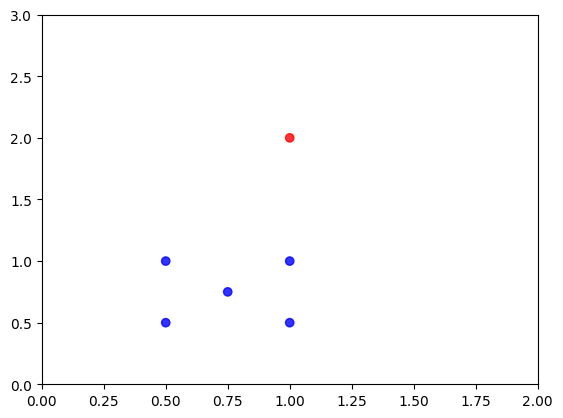

In [14]:
D_new = np.array([[1.0, 2.0], # Red 
                [1., 1.0],
                [0.5, 0.5],
                [1, 0.5],
                [0.5, 1],
                [0.75, 0.75]
                 ])

plt.scatter(D_new[:, 0], D_new[:, 1], alpha=0.8, c = ['red' if i == 0 else 'blue' for i in range(len(D_new))])
plt.axis([0, 2, 0,3])
plt.show()

*******************
The distance based approach for detecting the outlier above would not work with the provided parameters. The main idea of this approach is to determine outliers based on a fraction of points that should be $\epsilon$ distance close. Since the $\epsilon$ value is so large the outlier point has more than $\pi$ percent of all other points that have a distance of less than $\epsilon$. Thus the red point is not even considered an outlier using this approach. <br>
The depth based approach would also work very poorly. The base idea of this approach is to search for outlier at the border of the data space. Taking this approach and only marking points with $depth=1$ would also remove a lot of non-outlier points from the data set. <br>
Finally we have the (hopefully correct :)) angle based approach. The main idea of this approach is to consider the variance of the angles of the data points. We are then considered an outlier if our variance of angles are low. This is indeed the case in this example as the red point has the lowest angle variance among all the data points. 
******************

## Task 1.3 Theoretical questions (4 points)
<span style='color: green'>**\[Prove\]**</span> 

1. You are given a measure $d(x,y) = |x-y|$, prove that the measure is a metric 
2. Prove that $\hat{\Sigma}=
\frac{1}{n}\sum_{i=1}^n (x_i -\hat{\mu}^\top)\cdot(x_i -\hat{\mu}^\top)^\top=E[(X-\hat{\mu})(X-\hat{\mu})^\top]$

*******************
- 1 <br>
    In order to prove that the distance function $d$ is a metric, we will argue for the positive semidefinite, definte, symmetry and triangle inequality properties in the following. <br>
    - Positive Semidefinite <br>
        $dist(x,y) = | x - y | \geq 0$, because of the definition of the absolute value. <br>
    - Definte <br>
        $dist(x,y) = 0 ⇔ x = y$, because of the Identity of indiscernibles property of the aboslute value. <br>
    - Symmetry <br>
        $dist(x,y) = | x - y | = | y - x | = dist(y,x)$, because of the	evenness property of the aboslute value. <br>
    - Triangle Inequality <br>
        $dist(x,z) \leq dist(x,y) + dist(y,z) = | x - y | + | y - z | = | x - y + y - z | = | x - z | = dist(x,z)$
- 2 <br>
We are given $\hat{\Sigma}=E[(X-\hat{\mu})(X-\hat{\mu})^\top]$ from _Definition_ $(2.37)$ in Chapter $2$ of _Data mining and analysis: fundamental concepts and algorithms_ <br>
Therefore, we focus on showing $\frac{1}{n}\sum_{i=1}^n (x_i -\hat{\mu}^\top)\cdot(x_i -\hat{\mu}^\top)^\top=E[(X-\hat{\mu})(X-\hat{\mu})^\top]$. From _Definition_ $(2.13)$ of _Data mining and analysis: fundamental concepts and algorithms_, we have $\frac{1}{n}\sum_{i=1}^n (x_i -\hat{\mu}^\top)\cdot(x_i -\hat{\mu}^\top)^\top = \hat{\sigma}^{2}$. From _Definition_ $(2.11)$ we have $\hat{\sigma}^{2} = E[(X-\hat{\mu})^2] = E[(X-\hat{\mu})(X-\hat{\mu})^\top]$ 
******************

# Part 2 Exploratory data analysis
In this section, you will perform preliminary analysis on your data. These preliminary analysis are useful to understand how the data behaves, before running complex algorithms.<br>

This dataset is about red wine variants of the Portuguese "Vinho Verde" wine. It only contains physicochemical and sensory variables, so no prices, grape types and such. Every sample  has also a class of quality which has scores between 1 and 10. It has been used and published with [Cortez et al., 2009](http://dx.doi.org/10.1016/j.dss.2009.05.016)

In [15]:
toy = wq[wq['quality'].isin([4, 8])]
data_np = toy.to_numpy()
headers = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
X = data_np[:,:10]
y = data_np[:,11]
y = y.astype(int) - 1
rows, cols = np.shape(X)
toy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,4


## Task 2.1 Correlation matrix
### Task 2.1.1 (5 points)
A) <span style='color: green'>**\[Implement\]**</span> in the code-box below the **correlation matrix** (not covariance matrix) among all the attributes. <br>
<font color='red'>To CHECK your results you can use **numpy.corrcoef**.</font>

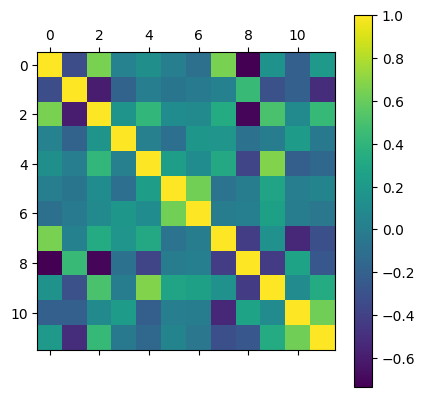

In [16]:
def my_mean(X):
    return sum(X)/len(X)

def correlation_matrix(X):
    n, d = X.shape
    corr = np.empty((d,d))
    for i in range(d):
        my_1 = my_mean(X[:,i])
        for j in range(d):
            my_2 = my_mean(X[:,j])

            sigma_ij = (1 / (n - 1)) * np.sum((X[:,i] - my_1) * (X[:,j] - my_2))
            sigma_i = (1 / (n - 1)) * np.sum((X[:,i] - my_1) * (X[:,i] - my_1))
            sigma_j = (1 / (n - 1)) * np.sum((X[:,j] - my_2) * (X[:,j] - my_2))

            corr[i,j] = sigma_ij / np.sqrt(sigma_i * sigma_j)

    return corr
    
X = data_np
Corr = correlation_matrix(X)

plt.matshow(Corr)
plt.colorbar()

<span style='color: green'>**\[Motivate\]**</span><br>
B) By observing the  **correlation matrix** in point A), which pair of different attributes has the highest correlation? <br>

*******************
Obviously, the diagonal of the correlation matrix has a correlation values of $1$, as a variable clearly is correlation with itself. <br>
Generally speaking when observing the pairs with highest correlation, we must look for regions (in the above plot) that has hight values (closest to $1$ or $-1$). Concrete observations could include that attribute $2$ and $7$ is correlated with attribute $0$. Further, attribute $8$ is inversly correlated with attribute $0$. Also attribute $11$ is correlated with attribute $10$ etc.
******************

<span style='color: green'>**\[Motivate\]**</span><br>
C) What does it mean that two attributs are highly correlated? <br>

*******************
Generally speaking correlation (thereby also correlation matrix) is a measure for the correlation or dependence between two random variables. We consider this association as a degree in which the pair of variables are linearly dependent. <br>
The correlation matrix is essentially just a normalized / standardized covariance matrix, where the covariance measures the joint variability of two random variables. Essentially the variables tend to show similar behavior. 
******************

<span style='color: green'>**\[Motivate\]**</span><br>
D) Based on the attributes of the data in Part 2 and your answer in C), did you expect the observation of B)? <br>

*******************
Looking at the attributes of the data given in Part $2$ it might be intuitive to argue that e.g. _fixed acidity_ (attribute $0$) and _citric acid_ (attribute $2$) are highly correlated. Furthermore, the attributes _alcohol_ (attribute $10$) and _quality_ (attribute $11$) also seem to be correlated, which I from personal experience can only agree with. <br>
Generally speaking, the attributes of the data that are correlated also seem to be intuitively correlated.
******************

### Task 2.1.2 (1 points)
<span style='color: green'>**\[Motivate\]**</span><br>

Plot the correlation matrix running the code below.
What is the relationship between the correlation matrix and the covariance matrix? (1) Check the correct box below and (2) motivate your answer.

- [ ] The correlation matrix contains the unnormalized covariance values
- [X] The correlation matrix contains the normalized covariance values
- [ ] The covariance matrix contains the variance of the correlation

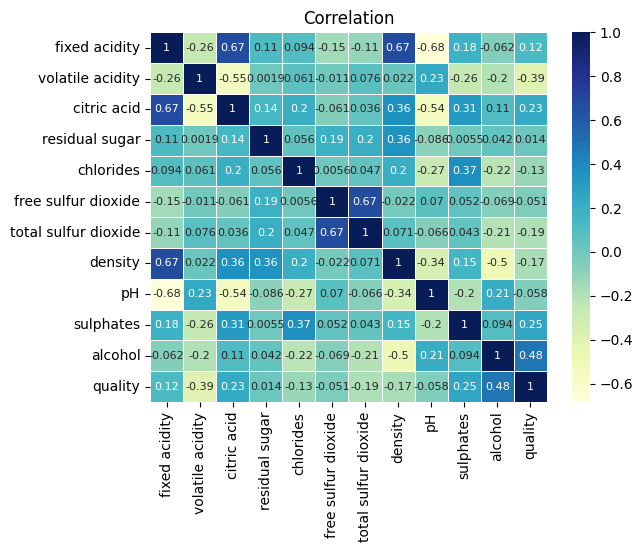

In [17]:
sns.heatmap(wq.corr(),annot=True,linewidths=.5, cmap="YlGnBu", annot_kws={"fontsize":8}, vmax=1)
plt.title('Correlation')
plt.show()

*******************
Also as described in Task 2.1.1.C the correlation matrix is essentially just a normalized / standardized covariance matrix, where the covariance measures the joint variability of two random variables. Essentially the variables tend to show similar behavior. 
******************

### Task 2.1.3 (3 points)

In this task, we reason about the covariance matrices.

<span style='color: green'>**\[Implement\]**</span> code for normalizing the features of the wine dataset using (1) standard score normalization and (2) range normalization. Finally, (3) plot the **covariance** matrices for
1. The unnormalized data
2. The [standard score normalized features](https://en.wikipedia.org/wiki/Standard_score)
3. The range (min-max) normalized features

The Unnormalied Data


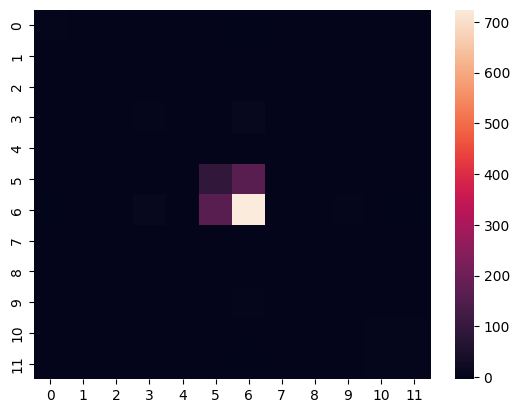

The Standard Score Normalized Data


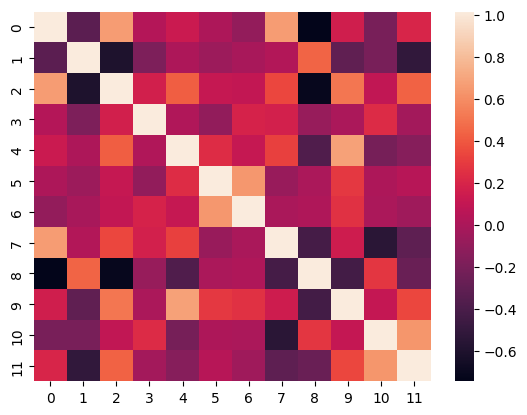

The Range Normalized Data


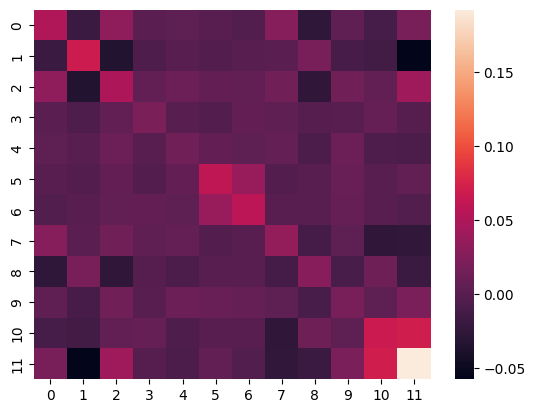

In [18]:
# Data
X = data_np
n, d = X.shape
np.set_printoptions(suppress=True)
def covariance_matrix(X):
    cov = np.empty((d,d))
    for i in range(d):
        my_1 = my_mean(X[:,i])
        for j in range(d):
            my_2 = my_mean(X[:,j])

            sigma_ij = (1 / (n - 1)) * np.sum((X[:,i] - my_1) * (X[:,j] - my_2))
            
            cov[i,j] = sigma_ij
    return cov
    
print("The Unnormalied Data")
Cov = covariance_matrix(X)
#Cov = np.cov(X, rowvar=False)
sns.heatmap(Cov, annot=False, fmt='g')
plt.show()



my = np.sum(X,axis=0) / n

sigma = np.sqrt(np.sum((X - my)**2, axis=0) / n)


def z_norm(X):
    std_norm = np.empty((n, d)) 
    for i in range(n):
        for j in range(d):
            std_norm[i,j] = (X[i,j] - my[j]) / sigma[j]
    return std_norm

print("The Standard Score Normalized Data")
std_norm = z_norm(X)
Cov = covariance_matrix(std_norm)
sns.heatmap(Cov, annot=False, fmt='g')
plt.show()

range_max = np.max(X, axis=0)
range_min = np.min(X, axis=0)

def range_norm_func(X):
    range_norm = np.empty((n, d)) 
    for i in range(n):
        for j in range(d):
            range_norm[i, j] = (X[i,j] - range_min[j]) / (range_max[j] - range_min[j])
    return range_norm
print("The Range Normalized Data")
range_norm = range_norm_func(X)
Cov = covariance_matrix(range_norm)
sns.heatmap(Cov, annot=False, fmt='g')
plt.show()


### Task 2.1.4 (3 points)
<span style='color: green'>**\[Describe\]**</span> how the covariance matrix changes with different normalization schemes and reason on why such behaviour appears.
You should notice some differences. (1) Check the correct box below and (2) motivate your answer.



- [ ] Range normalization preserves the variance. Therefore, features are directly comparable.
- [ ] Standard score normalization preserves the variance. Therefore, features are directly comparable.
- [ ] Both methods normalize in such a way, that it makes sense to compare the different covariance values to each other.
- [ ] None of the methods normalize in such a way that it makes sense to compare the different covariance values to each other.

<font color='red'>IMPORTANT: Do NOT just choose one answer. Please clarify WHY this is the correct answer.</font>

*******************
**YOUR ANSWER HERE**
******************

## Task 2.2 Normal distribution
### Task 2.2.1 (6 points)
Sometimes it is convenient to know whether a variable is close to a normal distribution.

<span style='color: green'>**\[Implement\]**</span> a method norm_dist that: <br>
    
1) **Inputs**: 
    * the number of buckets $b$ 
    * a vector $x$ of values 
2) First, compute the histogram of a Gaussian variable with mean $\mu$ corresponding to the sample mean of $x$ and $\sigma^2$ corresponding to the sample variance of $x$. Second, calculate the histogram of $x$ using $b$ buckets. 
3) **Output**: the sum of the absolute differences of the buckets between the two histograms computed in 2). The sum of the differences is computed as 
$$\sum_{i=1}^b |H_X(i) - H_{\mathcal{N}}(i)|$$ 
where $H_X(i)$ is the i-th bucket of the histogram of $x$ and $H_\mathcal{N}(i)$ is the i-th bucket of the hisotgram obtained from the normal distribution $\mathcal{N}(\mu,\sigma^2)$. 

<font color='red'>IMPORTANT: You can use the norm function from Scipy to get the normal distribution to subtract from.</font>

In [19]:
from scipy.stats import norm

## Our data comes from the variable X
X = data_np
def norm_dist(x, b): 
    dist = 0
    bucket_size = (np.max(x) - np.min(x)) / b
    my = np.sum(x) / len(x)
    sigma = np.sum((x - my)**2) / len(x)

    H_n = norm(my, sigma).rvs(len(x))

    for i in range(b):
        low = np.min(x) + (i*bucket_size)
        high = np.min(x) + ((i+1)*bucket_size)
        H_x_i = [value for idx, value in enumerate(x) if low <= value < high]
        print("Low", low, "High", high)
        print(H_x_i)
        
        H_n_i = [value for idx, value in enumerate(H_n) if low <= value < high]
        print(H_n_i)        
        dist += abs(len(H_x_i) - len(H_n_i))

    return dist


### Task 2.2.2 (6 point)
A) <span style='color: green'>**\[Motivate\]**</span> which drawbacks the method in Task 2.2.1 has. 

*******************
One drawback of the method in Task $2.2.1$ given just above is that if we choose to use too few buckets, then the distance might be a bit useless. For instance, if we consider a single bucket, then the distance is simply a measure of occurrences, which tells nothing about the distribution. 
******************

B) <span style='color: green'>**\[Motivate\]**</span> whether the method in Task 2.2.1  is robust to outliers. 

*******************
The method from Task 2.2.1 is not robust to outliers as it is affected by extreme values.
******************

<span style='color: green'>**\[Implement\]**</span><br>
C) Run your code on each columns of the dataset. 

In [20]:
n, d = X.shape
for i in range(d):
    dist = norm_dist(X[:,i],30)
    print("Dist for column {col} is {dist}".format(col = headers[i],dist=dist))

Low 4.6 High 4.866666666666666
[4.6]
[4.8020176313261, 4.829870952327476, 4.80925402432476]
Low 4.866666666666666 High 5.133333333333333
[5.0, 5.0]
[5.097908929070683, 5.012846996562811, 5.09801054265055, 4.883389899823926, 4.907141118309507]
Low 5.133333333333333 High 5.3999999999999995
[]
[5.219247708864367, 5.38958775752617, 5.375383523669033]
Low 5.3999999999999995 High 5.666666666666666
[5.6, 5.5, 5.6]
[5.567945940799004, 5.493598415846336]
Low 5.666666666666666 High 5.933333333333333
[5.7]
[5.785709365657587, 5.882437004764064, 5.877439177263362]
Low 5.933333333333333 High 6.199999999999999
[6.0]
[6.19151372846056, 5.959549894342981, 6.09079507148806]
Low 6.199999999999999 High 6.466666666666667
[6.3, 6.4, 6.2]
[6.302684023444004, 6.251788052507666]
Low 6.466666666666667 High 6.7333333333333325
[6.5, 6.5, 6.5, 6.6, 6.7]
[6.658647572768803, 6.569458241304691]
Low 6.7333333333333325 High 7.0
[6.9, 6.9, 6.8, 6.8, 6.9]
[6.883607378562407, 6.819644195917606, 6.810020822709262, 6.88308

<span style='color: green'>**\[Motivate\]**</span><br>
D) What is the column with the largest distance? 

*******************
The Density column is the column with the largest distance value. 
******************

<span style='color: green'>**\[Motivate\]**</span><br>
E) Do the attribute features follow a normal distribution?

*******************
Well, it seems as the attribute features has a hight difference between a normal distribution. Thereby, it does not seem as the attribute features follow a normal distribution. 
******************

### Task 2.2.3 (1 points)

Now look at the method below. This is called a Quantile-Quantile [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). 

<span style='color: green'>**\[Describe\]**</span> why this method is more robust than the one we proposed in Task 2.2.1.

<Figure size 640x480 with 0 Axes>

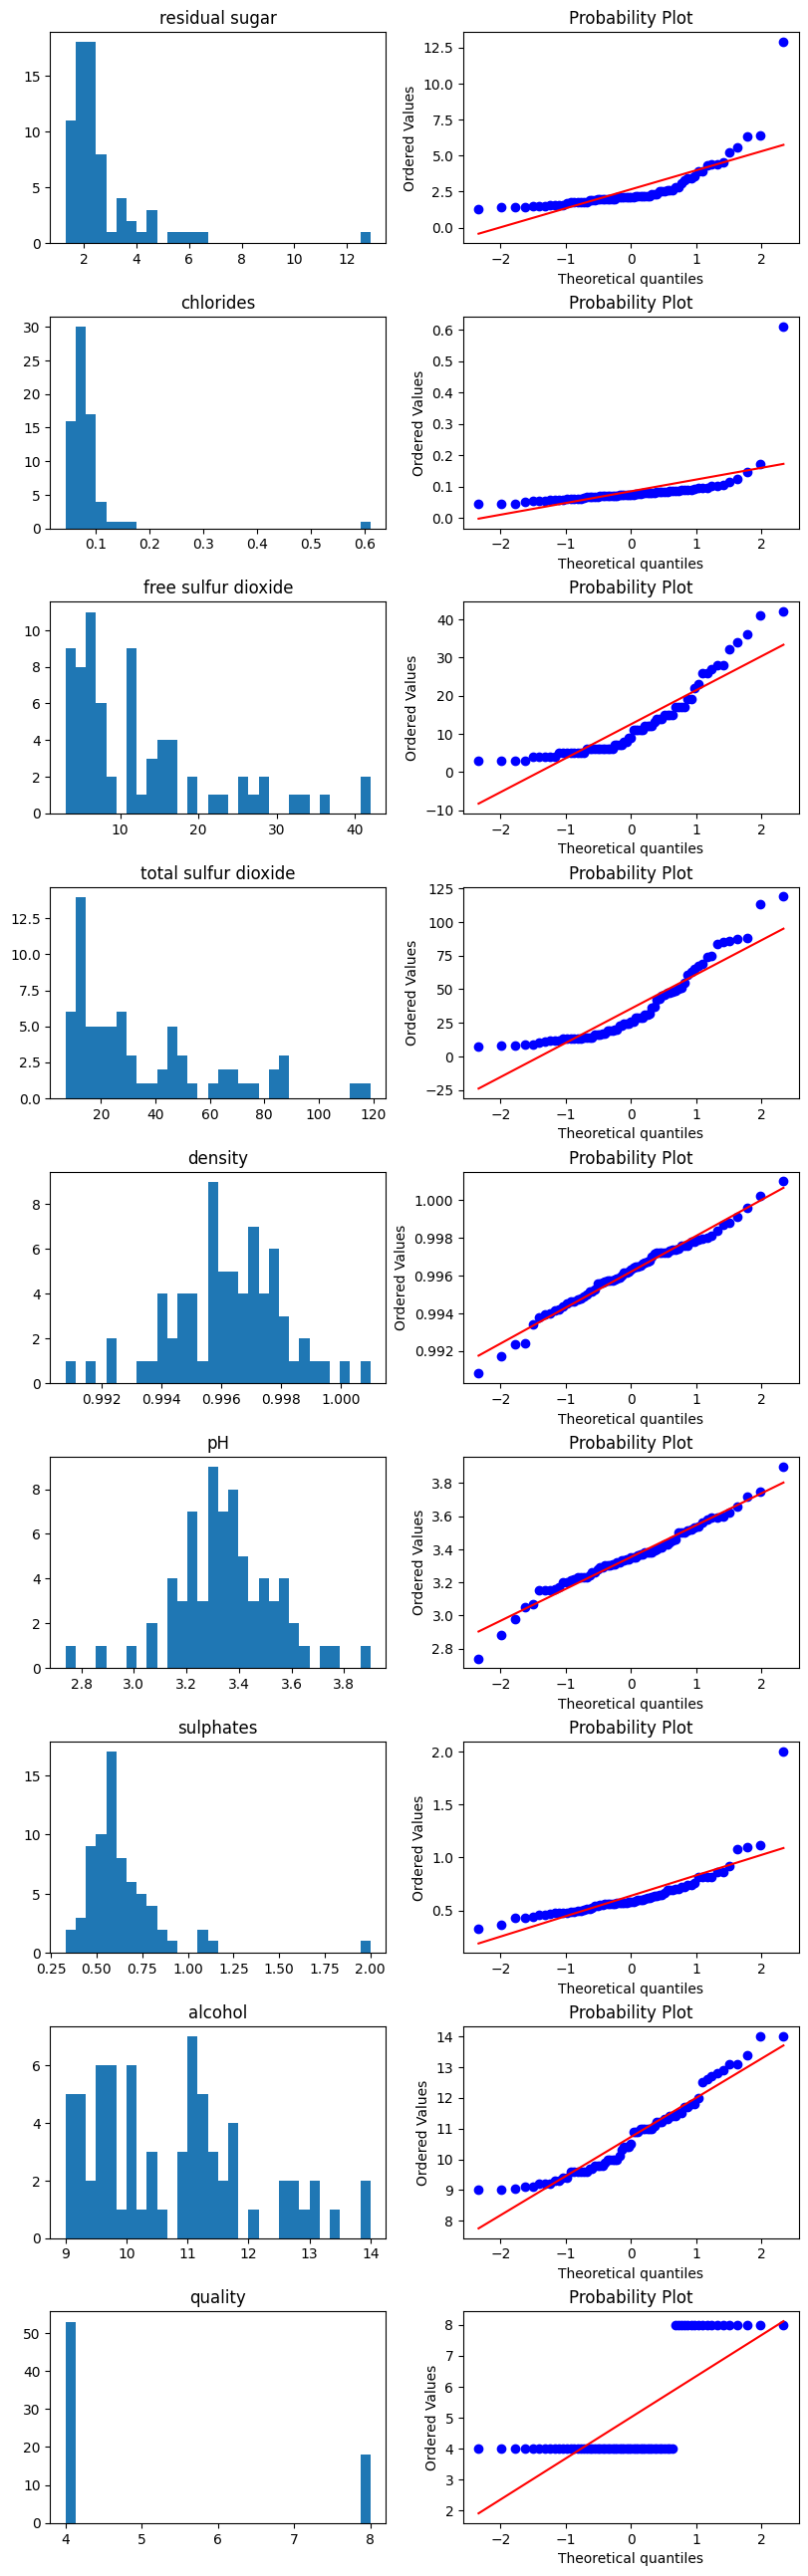

In [21]:
from scipy import stats
from matplotlib import gridspec

plt.tight_layout()
_, n = X.shape

fig = plt.figure(constrained_layout=True, figsize=(8, 30))
spec = gridspec.GridSpec(ncols=2, nrows=(n-1), figure=fig)
for i in np.arange(3,n): 
    x = toy[headers[i]]
    r = i-1
    qq = fig.add_subplot(spec[r, 1]) 
    stats.probplot(x, plot=qq)
    h = fig.add_subplot(spec[r, 0])
    h.set_title(headers[i])
    h.hist(x, bins = 30)

*******************
**YOUR ANSWER HERE**
******************

# Part 3 Cluster Analysis
In this section, you will perform cluster analysis of the dataset in Part 2 and modify clustering algorithms to achieve better results. 

## Task 3.1

### Task 3.1.1 (6 points)
A)  <span style='color: green'>**\[Implement\]**</span> and plot the **silhouette coefficient** to detect the number of clusters $k$. 

Use the "sulphates" and "alcohol" features of the data set.

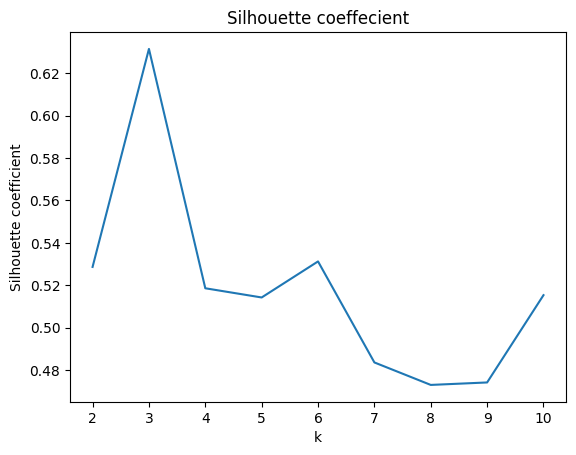

In [22]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()
k = 10

import sklearn
### YOUR CODE HERE

def L2_norm(x, y):
    return np.sqrt(np.sum((x-y)**2))

def int_c(o, cluster):
    return np.sum([L2_norm(X[o], X[c]) for c in cluster]) / (len(cluster)-1)
    
def ext(o, lbl, clusters):
    min_dist = float('inf')
    for (idx, cluster) in enumerate(clusters):
        if lbl != idx:
            temp = np.sum([L2_norm(X[o], X[c]) for c in cluster]) / len(cluster)
            if temp < min_dist: 
                min_dist = temp
    return min_dist





def silhouette_coefficient(clusters,labels):
    silhouette = []
    for i,x in enumerate(X):
        lbl = labels[i]
        if len(clusters[lbl])==1:
            silhouette.append(0)
        else:
            average_dist_c = int_c(i, clusters[lbl])
            average_distance_other = ext(i, lbl, clusters)

            temp = (average_distance_other - average_dist_c) / max(average_distance_other, average_dist_c)
            silhouette.append(temp)
    return np.mean(silhouette)





x_axis = []
y_axis = []

for i in range(2, k+1):
    kmeans = KMeans(i,random_state=0, n_init="auto").fit(X)
    label = kmeans.labels_

    clusters = [[i for i, x in enumerate(label) if x == t] for t in range(i)]

    
    sil_coefficients = silhouette_coefficient(clusters,label)
    x_axis.append(i)
    y_axis.append(sil_coefficients)



plt.plot(x_axis, y_axis)
plt.title('Silhouette coeffecient')
plt.xlabel('k')
plt.ylabel('Silhouette coefficient')
plt.show()



B) <span style='color: green'>**\[Motivate\]**</span> your choice of clusters $k$.

*******************
It seems that the best choice of K would be 3, since that would be the choice with the highest silhouette coefficient.
******************

### Task 3.1.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
Run k-means on the dataset X, with the number of clusters detected in the previous exercise.

<font color='red'>IMPORTANT: You can use the KMeans implementation from scikit-learn.</font> <br>

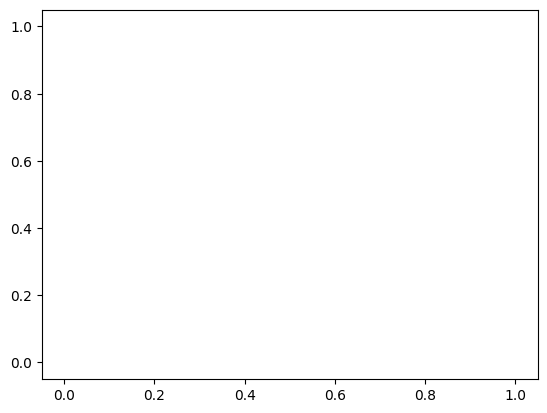

In [23]:
# Data
X = toy[["sulphates", "alcohol"]].to_numpy()
# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)


### YOUR CODE HERE
kmeans = KMeans(3,random_state=0, n_init="auto").fit(X)
kernel_labels = kmeans.labels_
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8, c=kernel_labels)

### Task 3.1.3 (6 points)
<span style='color: green'>**\[Implement\]**</span><br> Kernel K-means and the Gaussian Kernel. 

The Gaussian kernel is defined as in the following equation:

$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|^{2}}{2 \sigma^{2}}\right)$$ 


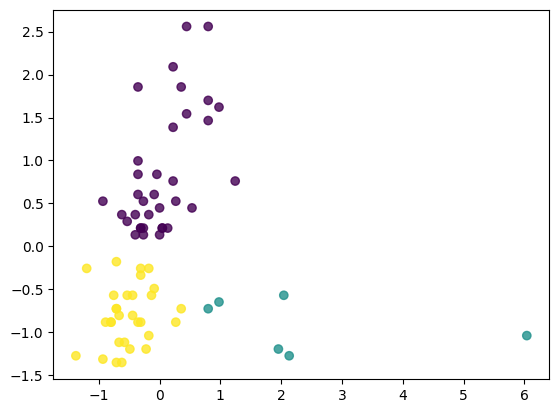

In [24]:
import random

### YOUR CODE HERE
X = toy[["sulphates", "alcohol"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

def gaussian_kernel(x, y, sigma=0.8): 
    k = np.exp(- (x - y)**2 / 2*sigma**2)
    return k

def partition(lst, n): 
    division = len(lst) / float(n) 
    return [ lst[int(round(division * i)): int(round(division * (i + 1)))] for i in range(n) ]

def kernel_kmeans(X, n_clusters, kernel=gaussian_kernel, iters=100, error=.01): 
    np.random.shuffle(X)
    clusters = partition(X, n_clusters)

    for i in range(iters):
        square_norm = []
        for cluster in clusters:
            cluster_square_norm = 0
            for i in cluster:
                for j in cluster:
                    if np.all(i != j):
                        cluster_square_norm += np.sum(kernel(i, j))
            cluster_square_norm = cluster_square_norm * (1 / (len(cluster) + error)**2)

            square_norm.append(cluster_square_norm)

        average_kernel_value = []
        for x in X:
            akv = []
            for cluster in clusters:
                value = 0
                for i in cluster:
                   value += np.sum(kernel(x,i))
                
                akv.append(1 / (len(cluster) + error) * value)
                
            average_kernel_value.append(akv)

        new_clusters = []
        new_clusters_points = [[] for i in range(len(X))]
        dist = []
        for x in range(len(X)):
            val = []
            for cluster in range(len(clusters)):
                val.append(square_norm[cluster] - 2*average_kernel_value[x][cluster])
            dist.append(val)

            j = np.argmin(val)
            new_clusters.append(j)
            new_clusters_points[j].append(X[x])
        
        clusters = new_clusters_points
        
    return new_clusters
NUMBER_OF_CLUSTERS = 2
SOME_AMOUNT_OF_CLUSTERS = 3
scaler = StandardScaler().fit(X_norm)
X_scaled = scaler.transform(X_norm)

#clusters = kernel_kmeans(X_norm, NUMBER_OF_CLUSTERS)

clusters = kernel_kmeans(X_scaled, SOME_AMOUNT_OF_CLUSTERS)



plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.8, c=clusters)



## Task 3.2 Clustering quality

### Task 3.2.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> **Conditional Entropy (CE)** as a measure for clustering quality.

Entropy for a clustering is $H(C) = - \sum_{i=1}^{k}{p_{C_i} \log {p_{C_i}}}$.

The **Conditional Entropy** of $T$ **given** $C$ is given by: 
$$\text{CE}(T|C)=-\sum\limits^{|C|}_{i=1}\sum\limits^{|T|}_{j=1}\frac{n_{ij}}{n}\log\frac{n_{ij}}{n_i}$$
where $n_{i}$ is the total number of points in cluster $C_i$ and $n_{ij}$ is the number of common points between clusters $C_i$ and $T_j$


**Hint**: First implement **Entropy** and then **Conditional Entropy**.

Entropy 0.656900693545218
CE 1.3170965182862349


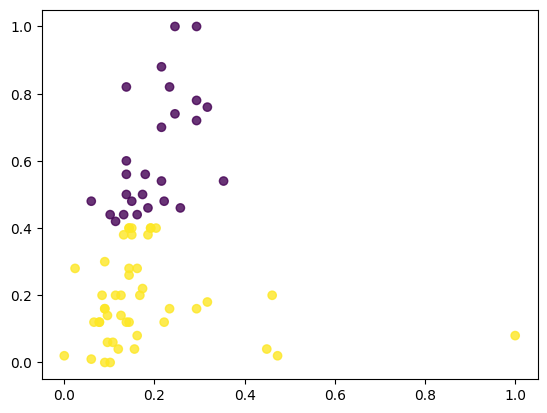

In [25]:
def entropy(C):
    # Let C be a list of clusters
    entropy = 0
    clusters = np.max(C)

    for i in range(clusters + 1):
        print("c",C)
        p_C_i = np.count_nonzero(C == i) / len(C)
        print("p_C_i",p_C_i)
        if p_C_i != 0:
            entropy += -(p_C_i * np.log(p_C_i))

    return entropy


def CE(C1, C2):
    ce = 0
    n = len(C1)
    clusters_C1 = np.max(C1)
    clusters_C2 = np.max(C2)
    for i in range(clusters_C1 + 1):
        for j in range(clusters_C2 + 1):
            intersection = [C1[k] == i and C2[k] == j for k in range(len(C1))]
            n_i_j = np.sum(intersection)
            n_i = np.count_nonzero(C1==i)
            if n_i_j !=0 and n_i != 0: 
                ce += - (n_i_j / n * np.log(n_i_j / n_i))
    return ce


X = toy[["sulphates", "alcohol"]].to_numpy()

# Necessary Data normalization!
X_norm = (X - X.min(0)) / X.ptp(0)

### Task 3.2.2 (3 points)
<span style='color: green'>**\[Implement\]**</span>
Print the Conditional Entropy (implementation from the Task 3.2.1) among the class labels $y$ and the clusters you found with k-means in Task 3.1.1. 
Make sure that the number of clusters and the number of class labels is the same.<br>

In [26]:
###YOUR CODE HERE
kernel_labels = kernel_kmeans(X_scaled, 2)
###YOUR CODE HERE
class_labels = np.array(toy["quality"])
class_labels = [1 if x == 8 else 0 for x in class_labels]
print("Conditional entropy",CE(np.array(class_labels),kernel_labels))

Conditional entropy 0.6930142999671276


<span style='color: green'>**\[Motivate\]**</span><br>
A) Reason about the measure, is the measure influenced by the size of the clusters?  

******************* 
**YOUR ANSWER HERE**
******************

<span style='color: green'>**\[Describe\]**</span><br>
B) What does the measure capture? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.2.3 (4 points)
<span style='color: green'>**\[Implement\]**</span><br>
Provide an implementation of purity. Recall that purity is the weighted sum of the individual $purity_i = \frac{1}{|C_i|} \max_{j=1..k}\{n_{ij}\}$ values where $n_{ij}$ is the number of common points in cluster $C_i$
and ground-truth cluster $j$ obtained from the labels $y$.

In [27]:
T = np.array([0,1,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1,0,1]) # Ground-truth clusters
C = np.array([1,0,1,1,0,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1]) # Clusters obtained by k-means

def purity(C, T):
    purity = 0
    clusters_C = np.max(C)
    clusters_T = np.max(T)

    for i in range(clusters_C + 1):
        purity_i = []

        for j in range(clusters_T + 1):
            intersection = [C[k] == i and T[k] == j for k in range(len(C))]
            n_i_j = np.sum(intersection) 
            
            purity_i.append(n_i_j)
        purity += np.max(purity_i)
    
    return purity / len(C)


print('Purity: {}, CE: {}'.format(purity(C,T), CE(C,T)))

Purity: 0.5454545454545454, CE: 1.372340446551471


### Task 3.2.4 (2 points)
A) <span style='color: green'>**\[Implement\]**</span><br>

Plot the purity of the clusters obtained by k-means in Task 3.1.1. 


In [28]:
### YOUR CODE HERE


### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare purity with **Conditional Entropy (CE)**. Which measure is preferable? (1) Check the correct box below and (2) motivate your answer.

- [ ] **CE** is preferable because it uses all the points
- [ ] Purity is preferable because it is less computational demanding
- [ ] **CE** is preferrable because it does not favor small clusters
- [ ] Purity is preferrable because it tends to favor balanced clusters.

*******************
**YOUR ANSWER HERE**
******************

### Task 3.3 OPTICS

### Task 3.3.1 (7 point)
<span style='color: green'>**\[Implement\]**</span> the OPTICS algorithm

If you do not remember [OPTICS](https://en.wikipedia.org/wiki/OPTICS_algorithm), check the slides or the lecture notes. 

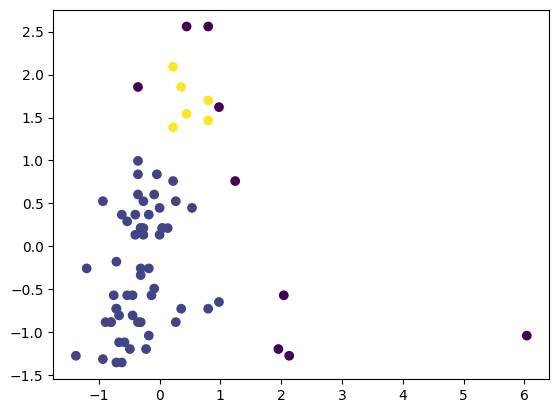

In [29]:
def L2_norm(x, y):
    return np.sqrt(np.sum((x-y)**2))

D = X_scaled
core_points = []
neighbors = dict()

def core_dist(x,eps,min_samples):
    N_x = neighbors[x].copy().tolist()
    N_x.sort(key=lambda a: a[1])
    if len(N_x) >= min_samples:
        return N_x[min_samples-1][1]
    else:
        return float('inf')


def rdist(x,y,eps,min_samples):
    ### YOUR CODE HERE
    rdis = 0
    if len(neighbors[x]) < min_samples:
        return float('inf')
    else:
        dist_x_y = L2_norm(D[x],D[y])
        core_dist_x = core_dist(x,eps,min_samples)
        if core_dist_x == float('inf'):
            return dist_x_y
        rdis= max(core_dist_x, dist_x_y)
        print("rdis", rdis,x,y)
    ### YOUR CODE HERE
    return rdis


def optics(X, eps, min_samples): 
    setup(X,eps,min_samples)
    clusters = []
    ### YOUR CODE HERE
    res = []
    processed = [False for x in X]
    reachability_distance = [float('inf') for x in range(len(X))]
    for p in range(len(X)):
        if processed[p]: continue
        N_p = neighbors[p]
        processed[p] = True
        res.append(p)
        if core_dist(p,eps,min_samples) != float('inf'):
            Seeds = []
            update(N_p,p,Seeds, eps,min_samples,processed,reachability_distance)

            while len(Seeds) > 0: #Should we pop q here, and also, is seeds acutally updated in
                q = Seeds.pop(0)
                q_i = q[0]
                N_q = neighbors[q_i]
                processed[q_i] = True
                res.append(q_i)
                if core_dist(q_i,eps,min_samples) != float('inf'):
                    update(N_q,q_i, Seeds, eps, min_samples, processed, reachability_distance)

    clusters = [-1 for i in X]
    cluster = 0
    initial = True
    for i,x in enumerate(res):
        if reachability_distance[x] <=eps or initial:
            clusters[x] = cluster
            initial = False
        else:
            if not initial:
                cluster += 1


    ### YOUR CODE HERE
    return [(x,reachability_distance[x]) for x in res],clusters


def update(N,p, Seeds: list, eps, min_samples,processed,reachability_distances):
    dist = core_dist(p,eps,min_samples)
    for u in N:
        o = int(u[0])
        if not processed[o]:
            new_reach_dist = max(dist,L2_norm(X_scaled[p],X_scaled[o]))
            if reachability_distances[o] == float("inf"):
                # if o == 8 or o== 14:
                #     print("p,o,new_reach first", p, o,new_reach_dist)    
                reachability_distances[o] = new_reach_dist
                Seeds.append((o,new_reach_dist))
                Seeds.sort(key=lambda a: a[1])
            else:
                if new_reach_dist < reachability_distances[o]:
                    # if o == 8 or o== 14:
                    #     print("p,o,new_read´ch second", p, o,new_reach_dist)    
                    reachability_distances[o] = new_reach_dist
                    o_i = [y[0] for y in Seeds].index(o)
                    Seeds[o_i] = (o,new_reach_dist)
                    Seeds.sort(key=lambda a: a[1])
    


def setup(X,eps,min_samples):
    for i in range(len(X)):
        x_neighbors = []
        for j in range(len(X)):
            dist = L2_norm(X[i],X[j])
            if dist <= eps:
                x_neighbors.append((int(j),dist))
        neighbors[i] = np.array(x_neighbors)
        if len(x_neighbors) >= min_samples:
            core_points.append(i)   


res,clusters = optics(X_scaled,0.5,3)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c =clusters)


### Task 3.3.2 (1 points)

<span style='color: green'>**\[Implement\]**</span><br>
A) Run OPTICS with parameters $\varepsilon=0.07, minPts=3$. <br> 

[0, -1, -1, -1, -1, -1, -1, 6, -1, -1, -1, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


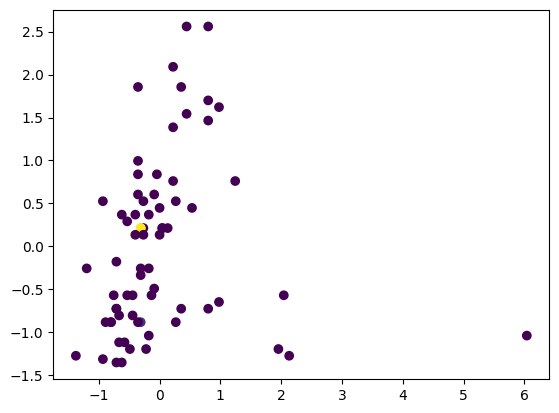

In [30]:
### YOUR CODE HERE
res, clusters =optics(X_scaled,0.07,3)
print(clusters)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c =clusters)
### YOUR CODE HERE

B) <span style='color: green'>**\[Motivate\]**</span><br>

Compare the results of OPTICS with those of k-means. Which of the two methods two achieve a better **CE**? 

*******************
**YOUR ANSWER HERE**
******************

### Task 3.3.3 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple subspace clustering algorithm.
1. Take all subsets of 2,3 attributes. Beware that you should only use the numerical attributes.
2. Run OPTICS on each subset. 
3. Compute **CE** for each subset. 
4. Keep the k subsets with the largest **CE**. 
    
<font color='red'>IMPORTANT: You may have to experiment a lot with eps and MinPts to get reasonable clusters. You are allowed to use **itertools** library to iterate over all subsets of size 2 and 3.</font>

In [31]:
# Necessary Data normalization!
X_pt = toy.to_numpy()
X_norm_pt = (X_pt - X_pt.min(0)) / X_pt.ptp(0) 

### YOUR CODE HERE




### YOUR CODE HERE

# Part 4 Outlier detection
In this exercise we will work with outlier detection techniques and analyze their performance on the small dataset. Before starting the exercise, run the code below. 


In [32]:
X_small = toy[["sulphates", "alcohol"]].to_numpy()

X_norm = (X_small - X_small.min(0)) / X_small.ptp(0)

## Task 4.1 (DBoutliers)
We will now compare two outlier detection techniques.
### Task 4.1.1 (6 points)
<span style='color: green'>**\[Implement\]**</span> a simple distance-based outlier detector. This is the distance-based outlier detection from the lectures, where a point is considered an outlier if at most a fraction $pi$ of the other points have a distance less of than $eps$ to it.

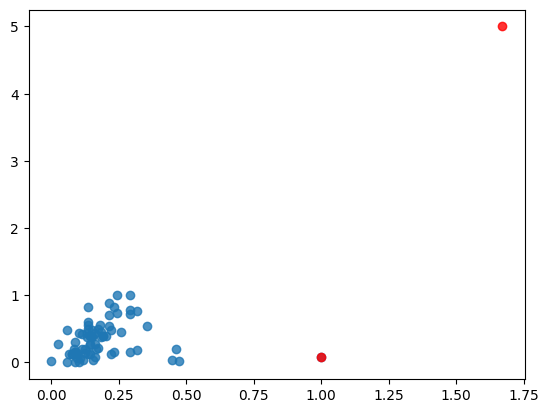

In [42]:
def L2_norm(x, y):
    return np.sqrt(np.sum((x-y)**2))

def DBOutliers(X, eps, pi): 
    outliers = np.empty((1, 2), dtype=float)
    for x in X:
        count = 0
        for y in X:
            if np.any(x != y):
                dist = L2_norm(x, y)
                if dist < eps:
                    count += 1
        
        fraction = count / len(X)
        if fraction <= pi:

            outliers = np.append(outliers, [x], axis=0)
    
    return outliers

outliers = DBOutliers(X_norm, 0.6, 0.2)

plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8)
plt.scatter(outliers[:, 0], outliers[:, 1], alpha=0.8, c='red')

### Task 4.1.2 (2 points)
A) <span style='color: green'>**\[Implement\]**</span>
DBOutliers requires tuning the parameters eps, pi. Run the code from Task 4.1.1 with different choices of eps, pi 

**Note** that the data is normalized. Choose two ranges with **at least** 4 values each.  

In [40]:
# pip install ipywidgets
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

@widgets.interact_manual(
epsilon=(0,1.), pi=(0,1.))
def plot(epsilon=(0,1.), pi=(0,1.)):
    outliers = DBOutliers(X_norm, epsilon, pi)
    plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8)
    plt.scatter(outliers[:, 0], outliers[:, 1], alpha=0.8, c='red')


interactive(children=(FloatSlider(value=0.5, description='epsilon', max=1.0), FloatSlider(value=0.5, descripti…

B) <span style='color: green'>**\[Motivate\]**</span><br>

**Present** the results  and **discuss** how the results vary with respect to (1) eps and (2) pi.

*******************
When considering the DBOutlier w.r.t. the $\epsilon$ value, we set the value for $\pi$ to something fixed and observe how the change in $\epsilon$ affacts the outliers. We clearly observe that the amount of outliers shrink as we increase the $\epsilon$ value. Intuitively, this also makes sense as the fraction of points that are smaller than some fixed $\pi$ decrease, causing fewer points to be classified as outliers. <br>
Similarly, we now fix a value for the radius $\epsilon$ and change the value for $\pi$ and observe how the change in $\pi$ affacts the outliers. In this case, we see that an increase in the value for $\pi$ would result in additional points to be classified as outliers. This reasons well, as $\pi$ is a threshold. Increasing this threshold would naturally lead to more points to be classified as outliers. 
******************

### Task 4.1.3 (3 points)
**NOTE** This is hard but also fun. Since it is not impacting the grade too much, you can choose to invent something new.

A) Propose and <span style='color: green'>**\[Implement\]**</span> a heuristic method to tune parameters eps, pi. 

0.3356142940634127 0
[[0.02613934 0.2209    ]
 [1.         0.08      ]]


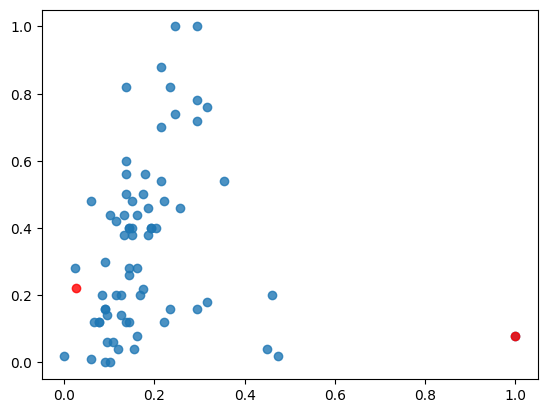

In [43]:
def L2_norm(x, y):
    return np.sqrt(np.sum((x-y)**2))

def tune_dboutliers(X): 
    eps = 0
    pi = 0

    for i in X:
        for j in X:
            if np.any(i != j):
                eps += L2_norm(i,j)
    eps = eps / (len(X)**2)
    
    return eps, pi

eps, pi = tune_dboutliers(X_norm)
print(eps,pi)
outliers = DBOutliers(X_norm, eps, pi)
print(outliers)
plt.scatter(X_norm[:, 0], X_norm[:, 1], alpha=0.8)
plt.scatter(outliers[:, 0], outliers[:, 1], alpha=0.8, c='red')

B) <span style='color: green'>**\[Describe\]**</span> your algorithm, its main idea, its strengths and its weaknesses

*******************
**YOUR ANSWER HERE**
******************

## Task 4.2 LOF (2 points)
<span style='color: green'>**\[Describe\]**</span><br>
Using the parameters eps=0.18, pi=0.2 compare the results of DBOutliers with those obtained by LOF implemented in Week 9. What outliers do you find?

In [36]:
### YOUR CODE HERE

*******************
**YOUR ANSWER HERE**
******************